# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [30]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

Let's generate our dataset and take a look on it.

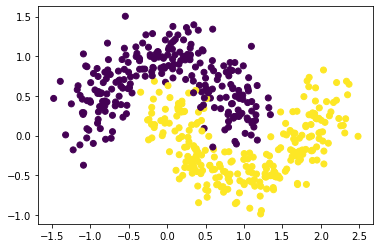

In [58]:
moons_points, moons_labels = make_moons(n_samples = 500, noise = 0.2, random_state = 42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c = moons_labels)

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, 
                                                    test_size = 0.33, random_state = 42)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

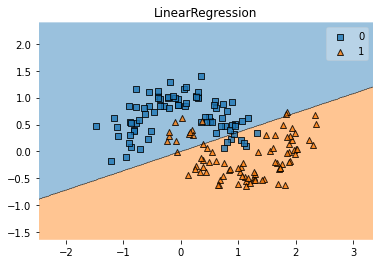

f1-score of model LinearRegression is 0.8571428571428571


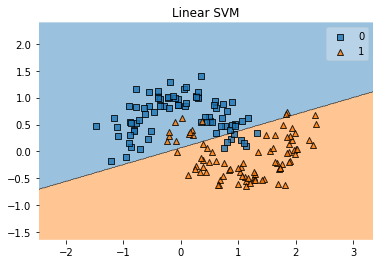

f1-score of model Linear SVM is 0.8711656441717791


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import gridspec
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_decision_regions

def print_report(name, model, figsize = (5, 5), multiclass = False, ax = None):
    model.fit(X_train, y_train)
#     plt.show()
    if ax: 
        ax.set_title(name)
        plot_decision_regions(X_test, y_test, model, ax = ax)
    else: 
        plt.title(name)
        plot_decision_regions(X_test, y_test, model)
        plt.show()
    if multiclass: metrics = f1_score(y_test, model.predict(X_test), average = 'weighted')
    else: metrics = f1_score(y_test, model.predict(X_test))
    print("f1-score of model {} is {}".format(name, metrics))
    return metrics

lr = LogisticRegression(tol = 1e-3, fit_intercept = False, random_state = 42)
# add some params
svm = SVC(C = 0.8, kernel = 'linear', random_state = 42)
# here too
_ = print_report("LinearRegression", lr)
_ = print_report("Linear SVM", svm)
### YOUR CODE HERE

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?


***My thoughts***:

The best classification metrcis is on `rbf` infinite kernel because it is the most flexible one. 

Polynomial kernel with `degree = 3` which is representative too because the set looks like to be symmetrical around the center. 

Decision boundary became non-linear, classification metric is increased.

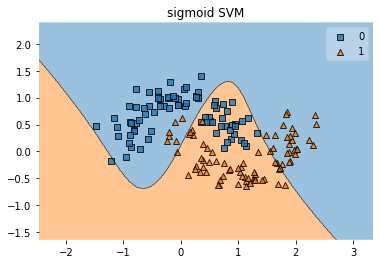

f1-score of model sigmoid SVM is 0.588957055214724


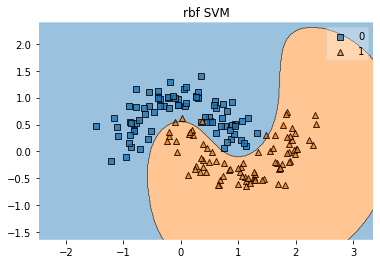

f1-score of model rbf SVM is 0.975609756097561
f1-score of model poly svm with degree 2 is 0.8167539267015707
f1-score of model poly svm with degree 3 is 0.9186046511627907
f1-score of model poly svm with degree 4 is 0.7092198581560283
f1-score of model poly svm with degree 5 is 0.8163265306122449
f1-score of model poly svm with degree 6 is 0.6917293233082707


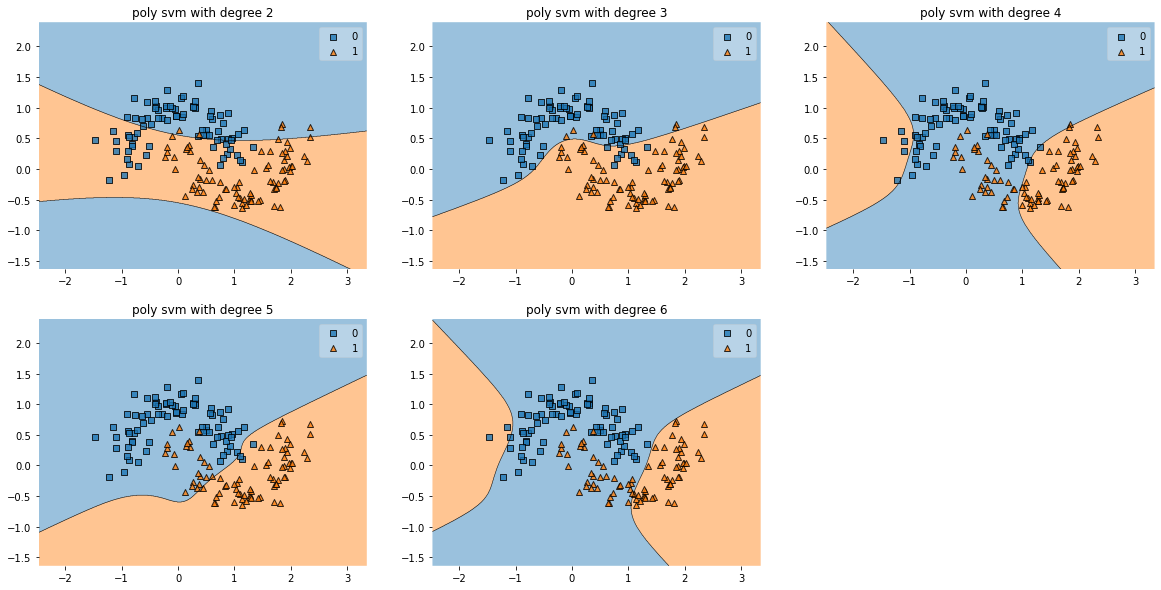

In [74]:
### YOUR CODE HERE
import itertools

rbf_svm = SVC(kernel = "rbf")
sigmoid_svm = SVC(kernel = 'sigmoid')
_ = print_report("sigmoid SVM", sigmoid_svm)
_ = print_report("rbf SVM", rbf_svm)

fig = plt.figure(figsize = (20, 10))
gs = gridspec.GridSpec(2, 3)
ax = np.empty([5], dtype=object)
for i in range(5):
    ax[i] = fig.add_subplot(gs[i])
    
for degree in range(2, 7):
    poly_svm = SVC(kernel = "poly", degree = degree)
    _ = print_report("poly svm with degree {}".format(degree), poly_svm, ax = ax[degree - 2], figsize = (20, 7))

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type) 

border became more accurate, borders type -- polys of the 3rd degree.

* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

degree of Polynomial Features == degree of Polynomial SVC, because we do the same thing in 2 different ways. 

linear SVC with Polynomial Features


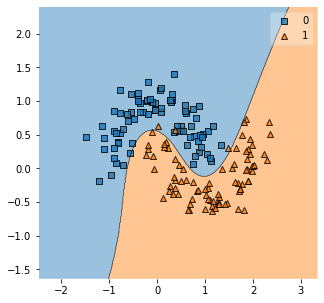

f1-score of model linear SVC with Polynomial Features is 0.9818181818181818


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

clf = Pipeline([("poly_features", PolynomialFeatures(3)), ("clf", SVC(kernel = 'linear'))])
_ = print_report("linear SVC with Polynomial Features", clf)
### YOUR CODE HERE

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

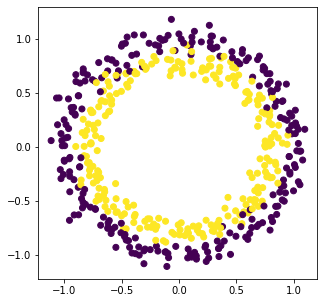

In [25]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples = 500, noise = 0.06, random_state = 42)

plt.figure(figsize = (5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c = circles_labels)

LR with Polynomial Features


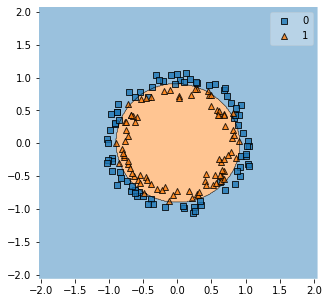

f1-score of model LR with Polynomial Features is 0.9454545454545454
SVM with Polynomial Kernel


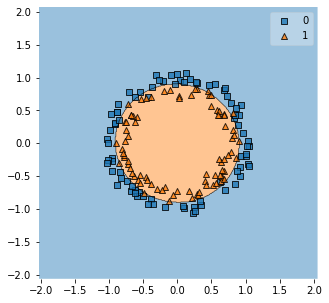

f1-score of model SVM with Polynomial Kernel is 0.9518072289156626
SVM with RBF Kernel


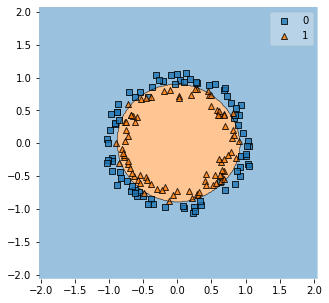

f1-score of model SVM with RBF Kernel is 0.9390243902439025


In [26]:
X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size = 0.33, 
                                                    random_state = 42)

clf_linear = Pipeline([("poly_features", PolynomialFeatures(3)), ("clf", LogisticRegression(solver = 'saga'))])
_ = print_report("LR with Polynomial Features", clf, multiclass = True)

def K(X1, X2):
    return (X1 @ X2.T) ** 2
clf_poly = SVC(kernel = lambda x1, x2: K(x1, x2))
_ = print_report("SVM with Polynomial Kernel", clf_poly)

clf_rbf = SVC(decision_function_shape = 'ovo')
_ = print_report("SVM with RBF Kernel", clf_rbf)

And even more:

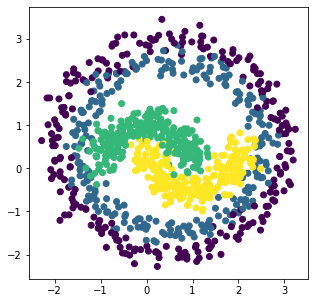

In [27]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize = (5, 5))
plt.scatter(points[:, 0], points[:, 1], c = labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

LR with Polynomial Features


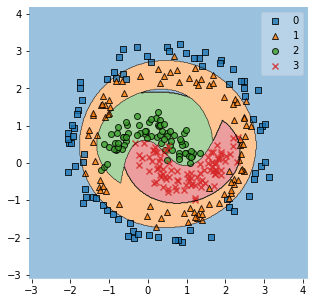

f1-score of model LR with Polynomial Features is 0.9485636145653202
SVM with Polynomial Kernel


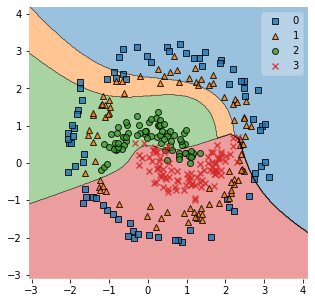

f1-score of model SVM with Polynomial Kernel is 0.47420312190532776
SVM with RBF Kernel


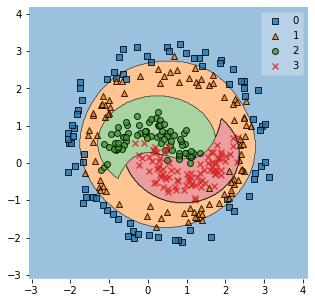

f1-score of model SVM with RBF Kernel is 0.9152493321722015


In [28]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size = 0.33, random_state = 42)

clf_linear = Pipeline([("poly_features", PolynomialFeatures(3)), ("clf", LogisticRegression(multi_class = True, 
                                                                                            solver = 'saga'))])
_ = print_report("LR with Polynomial Features", clf, multiclass = True)

def K(X1, X2):
    return (X1 @ X2.T) ** 3
clf_poly = SVC(kernel = lambda x1, x2: K(x1, x2))
_ = print_report("SVM with Polynomial Kernel", clf_poly, multiclass = True)

clf_rbf = SVC(decision_function_shape = 'ovo')
_ = print_report("SVM with RBF Kernel", clf_rbf, multiclass = True)

**Conclusion**: we need to look at our data to justify the type of decision boundary, type of features we should use, the naive example is XOR which is not linearly separatable. But if is needed use baseline, it is reasonable to switch to `RBF-kernel` of other infinite ones.